In [6]:
#import all relevant libraries and functions 
import numpy as np
from create_cells import plot_spherocylinder, generate_spherocylinder_mask
from efd import efd_cost_function_plot, find_optimal_efd
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt


Generate some synthetic data

In [7]:
#Create multiple instances of data to be analysed
# Define parameter lists
L = np.linspace(25, 225, 21)
R = np.linspace(10,25, 6)
print(R)
phi_list = np.pi/4
pixelation_constant = 0.5 

l_list = []
r_list = []
Phi_list = []
counter = 0  # Track index for image storage
binary_mask_list = []

# Loop through predefined values
for l in L:
    for r in R: 
        # Generate spherocylinder outline
        outline_x, outline_y = plot_spherocylinder(l, r, phi_list)
        l_list.append(l)
        r_list.append(r)
        Phi_list.append(phi_list)
        # Create figure and plot
        binary_mask, extent = generate_spherocylinder_mask(outline_x, outline_y, pixelation_constant)
        binary_mask = (binary_mask>128).astype(np.uint8)

        # Store the image
        binary_mask_list.append(binary_mask)
        
        counter += 1  # Increment index

[10. 13. 16. 19. 22. 25.]


Using one of the synthetic data output the AIC and BIC plot

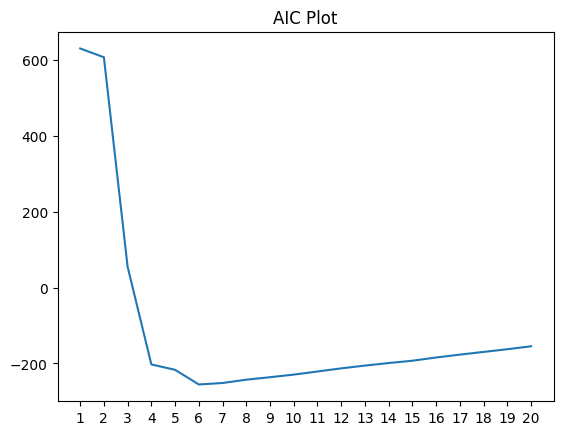

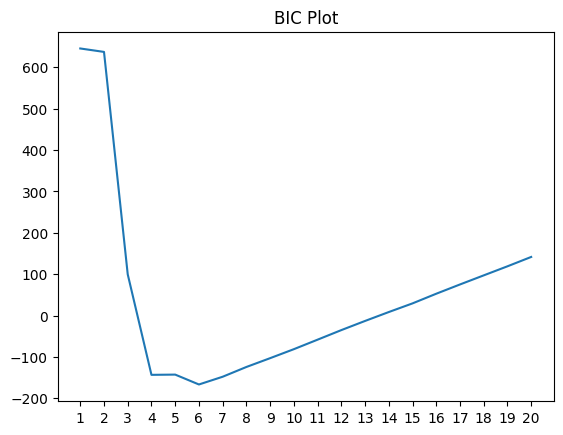

In [8]:
mask_1 = binary_mask_list[1]
#Plot the AIC cost function vs order 
efd_cost_function_plot(mask_1, "AIC" )
efd_cost_function_plot(mask_1, "BIC")



For the above list of images, find the optimal EFD order and plot how radius, length, bending and pixelation effects the efd order

In [9]:
optimal_AIC_order = []
optimal_BIC_order = []

for image in binary_mask_list: 
    optimal_efd_order_AIC, optimal_xt_AIC, optimal_yt_AIC = find_optimal_efd(image)
    optimal_efd_order_BIC, optimal_xt_BIC, optimal_yt_BIC = find_optimal_efd(image, "BIC")
    optimal_AIC_order.append(optimal_efd_order_AIC)
    optimal_BIC_order.append(optimal_efd_order_BIC)


data_dict = {
    'Optimal AIC order': optimal_AIC_order,
    'Optimal BIC order': optimal_BIC_order,
    'Length of Mid': l_list,
    'Radius of Circle': r_list,
    'Phi of Cell': Phi_list
    
}
for key, value in data_dict.items():
    print(f"{key}: {len(value)}")
# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data_dict)
df = df.map(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)



Optimal AIC order: 126
Optimal BIC order: 126
Length of Mid: 126
Radius of Circle: 126
Phi of Cell: 126


Plot of how length of the cell affects the EFD order

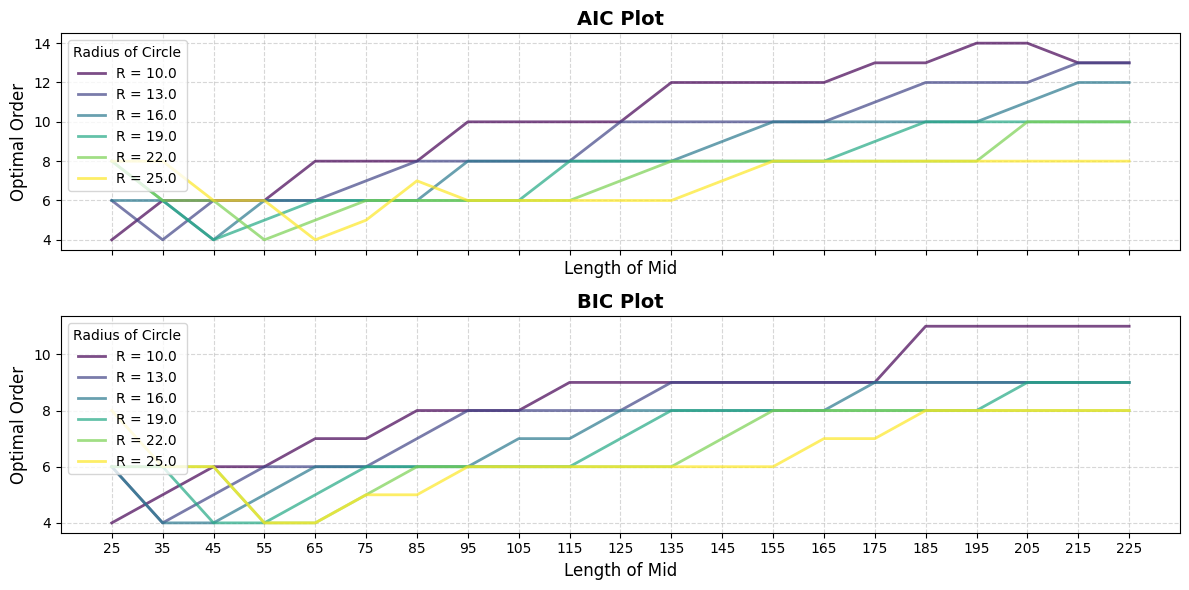

In [10]:

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Define color map for better distinction
colors = plt.cm.viridis(np.linspace(0, 1, len(R)))

for i, color in enumerate(colors):  
    df_filtered = df[df["Radius of Circle"] == R[i]]
    
    # AIC Plot
    axes[0].plot(df_filtered["Length of Mid"], df_filtered["Optimal AIC order"], 
                 label=f"R = {R[i]}", color=color, alpha=0.7, linewidth=2)
    
    # BIC Plot
    axes[1].plot(df_filtered["Length of Mid"], df_filtered["Optimal BIC order"], 
                 label=f"R = {R[i]}", color=color, alpha=0.7, linewidth=2)

# Formatting
for ax, title in zip(axes, ["AIC Plot", "BIC Plot"]):
    ax.set_xticks(np.arange(25, 230, 10))
    ax.set_xlabel("Length of Mid", fontsize=12)
    ax.set_ylabel("Optimal Order", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(title="Radius of Circle", fontsize=10, loc="best")
    ax.grid(True, linestyle="--", alpha=0.5)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


The above is shown for a dataset with varying lengths and radius, the same was done previously for radius, bending and pixelation constant shown to Dr Somenath (this can be included after exams if needed but to keep it neat I will just include one)